In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the data
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'NSL_regular_season_data_2.csv')
print(data_path)
data = pd.read_csv(data_path)

/workspaces/Wharton-HS-Competition-Soccer-Playoff-Predictions/data/NSL_regular_season_data_2.csv


In [17]:
# Visualize the data
data

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,game_2023_81,TUC,WIC,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33
472,game_2023_36,DOV,WIC,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31
473,game_2023_269,SFS,WIC,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54
474,game_2023_298,ALB,WIC,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43


In [18]:
# Create a new column called 'Winner' that contains 1 if team wins, 0 if team loses
data['Winner'] = data['HomeScore'] > data['AwayScore']

# Create a date column from the matches.
data['GameNumber'] = data['game_id'].str.split('_', expand=True)[2]
data['GameNumber'] = data['GameNumber'].astype(int)
data.drop('game_id', axis=1, inplace=True)
data.sort_values(by='GameNumber', inplace=True)

# Drop the 'HomeScore' and 'AwayScore' columns
data = data.drop(['HomeScore', 'AwayScore'], axis=1)

In [19]:
# Visualize the mean and spread of the data
data.describe()

,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,GameNumber
count,476.000000,476.000000,476.000000,476.00000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.612752,0.997605,15.178571,11.10084,5.401261,4.266807,0.042017,0.018908,0.264706,0.111345,0.518004,238.500000
std,0.717091,0.526305,5.487176,4.51644,2.766856,2.248328,0.211061,0.150996,0.508138,0.346710,0.085601,137.553626
min,0.200000,0.060000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,1.000000
25%,1.110000,0.590000,12.000000,8.00000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.450000,119.750000
50%,1.540000,0.970000,15.000000,11.00000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.530000,238.500000
75%,2.102500,1.320000,19.000000,14.00000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.570000,357.250000
max,4.030000,2.630000,30.000000,23.00000,16.000000,11.000000,2.000000,2.000000,2.000000,2.000000,0.770000,476.000000


In [20]:
# Split the data into a feature matrix and a target vector
X = data
y = data['Winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [21]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(X_train, target = 'Winner', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Winner
2,Target type,Binary
3,Original data shape,"(357, 15)"
4,Transformed data shape,"(357, 15)"
5,Transformed train set shape,"(249, 15)"
6,Transformed test set shape,"(108, 15)"
7,Numeric features,12
8,Categorical features,2
9,Preprocess,True


In [22]:
best = s.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:37:35
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6908,0.7611,0.4911,0.6505,0.5535,0.3254,0.3364,0.3970
ridge,Ridge Classifier,0.6865,0.0000,0.4911,0.6460,0.5490,0.3182,0.3298,0.0550
rf,Random Forest Classifier,0.6707,0.6687,0.5111,0.5964,0.5405,0.2903,0.2976,0.2140
lda,Linear Discriminant Analysis,0.6667,0.6897,0.5300,0.5822,0.5427,0.2855,0.2958,0.0580
lightgbm,Light Gradient Boosting Machine,0.6623,0.6803,0.5089,0.6005,0.5376,0.2765,0.2880,0.2890
et,Extra Trees Classifier,0.6505,0.6742,0.4578,0.5912,0.5027,0.2421,0.2547,0.2060
gbc,Gradient Boosting Classifier,0.6305,0.6629,0.5111,0.5381,0.5116,0.2190,0.2256,0.1290
knn,K Neighbors Classifier,0.6188,0.5832,0.4222,0.5567,0.4622,0.1772,0.1932,0.0650
ada,Ada Boost Classifier,0.6187,0.6245,0.4889,0.5321,0.4978,0.1927,0.1995,0.1270
dummy,Dummy Classifier,0.6065,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0570


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

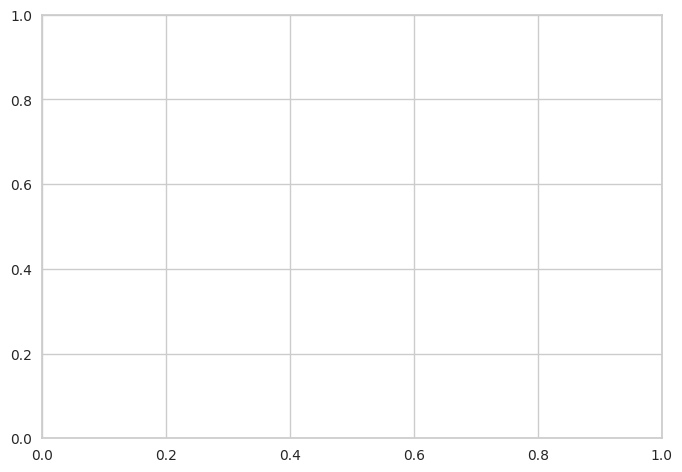

In [23]:
s.evaluate_model(best)

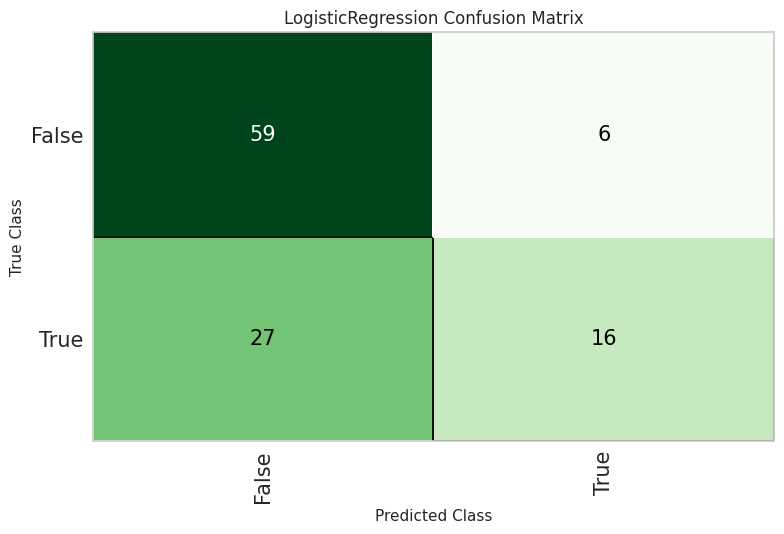

In [24]:
s.plot_model(best, plot = 'confusion_matrix')

In [25]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6944,0.7302,0.3721,0.7273,0.4923,0.3050,0.3401


,HomeTeam,AwayTeam,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,GameNumber,Winner,prediction_label,prediction_score
32,WIC,ANC,0.71,1.49,10,14,5,6,0,0,0,0,0.59,129,False,0,0.9265
93,TOL,CHM,1.67,1.60,27,16,7,8,0,0,0,0,0.46,462,False,0,0.8540
460,EUG,WIC,1.58,0.45,10,9,7,5,0,0,0,1,0.39,150,True,1,0.6060
286,AUG,MOB,2.22,0.27,22,6,6,3,0,0,0,0,0.58,111,True,1,0.5978
169,TOL,FAR,1.24,1.52,16,14,2,1,0,0,1,0,0.61,64,False,0,0.8895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,TAC,SPR,3.01,1.17,20,15,5,2,0,0,0,0,0.63,242,True,0,0.5005
7,TAC,ALB,0.36,1.21,6,7,3,5,0,0,0,0,0.56,366,False,0,0.8623
43,TOL,AUG,0.34,1.13,2,15,11,3,0,0,0,0,0.50,380,False,0,0.7909
55,SPR,BAK,0.90,1.18,11,8,4,4,0,0,0,1,0.48,41,False,0,0.8141


In [26]:
predictions = s.predict_model(best, data=X_test, raw_score=True)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7059,0.7285,0.4773,0.6364,0.5455,0.3346,0.3421


,HomeTeam,AwayTeam,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,GameNumber,Winner,prediction_label,prediction_score_0,prediction_score_1
73,TUC,BOI,1.06,2.09,17,14,7,7,0,0,1,1,0.53,12,False,0,0.9160,0.0840
208,ALB,LAR,0.62,0.78,11,17,9,4,0,0,0,0,0.54,6,False,0,0.8531,0.1469
270,TOL,MAN,0.56,1.10,10,12,5,2,0,0,1,0,0.62,73,False,0,0.8490,0.1510
356,FOR,SAS,0.44,1.23,6,18,3,1,0,0,0,0,0.62,218,True,0,0.9071,0.0929
109,TOL,DES,1.43,0.54,19,13,7,4,0,0,0,0,0.42,115,True,0,0.7069,0.2931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,SPR,SJU,2.35,1.17,15,7,7,6,0,0,0,0,0.52,182,True,1,0.4868,0.5132
152,ALB,EUG,1.04,0.75,11,11,1,2,0,0,0,0,0.65,286,False,0,0.7205,0.2795
16,EUG,ALB,0.83,1.48,12,16,4,3,0,0,1,0,0.50,80,False,0,0.9015,0.0985
31,ALB,ANC,0.41,1.90,9,17,4,4,0,0,1,0,0.53,217,False,0,0.9481,0.0519


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

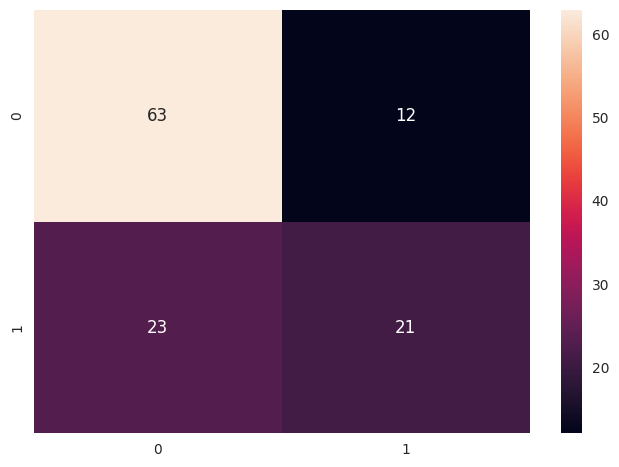

In [27]:
# Show confusion matrix for predictions
conf_matrix = confusion_matrix(predictions['Winner'], predictions['prediction_label'])
sns.heatmap(conf_matrix, annot=True)

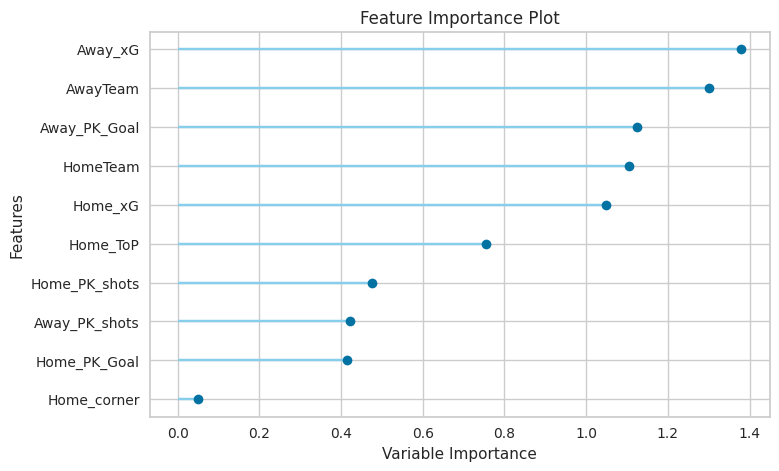

In [28]:
# Try to view feature importances for the model if applicable
try:
    s.plot_model(best, plot = 'feature')
except:
    print('Feature importances not available for this model')

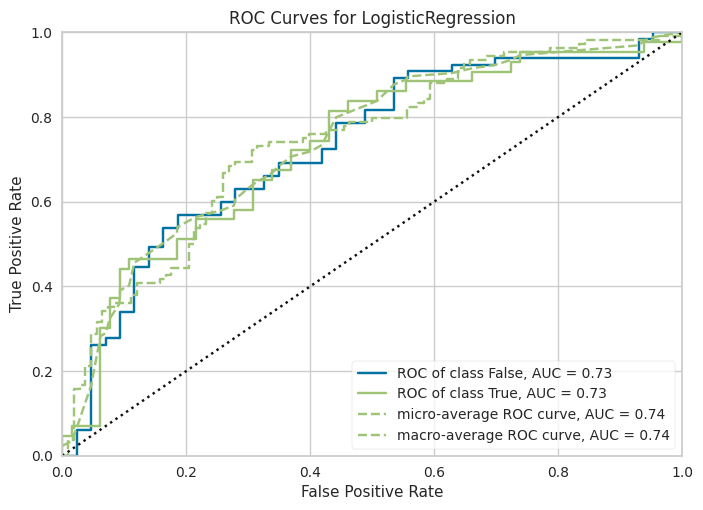

In [29]:
try:
    s.plot_model(best, plot = 'auc')
except:
    print('AUC not available for this model')

In [30]:
s.save_model(best, 'best_pycaret_whole_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Home_xG', 'Away_xG', 'Home_shots',
                                              'Away_shots', 'Home_corner',
                                              'Away_corner', 'Home_PK_Goal',
                                              'Away_PK_Goal', 'Home_PK_shots',
                                              'Away_PK_shots', 'Home_ToP',
                                              'GameNumber'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
                                                               handle_unknown='value',
                   